In [1]:
pip install tensorflow



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import cv2
import matplotlib.pyplot as plt

In [10]:
# Initialize MobileNet pre-trained on ImageNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # Adjust the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 128)               131200    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3,360,580
Trainable params: 131,716
Non-

In [11]:
import os
import cv2
import numpy as np

def load_images_and_labels(directory, img_size=(224, 224)):
    """
    Load images and labels from a dataset directory.

    Args:
        directory (str): Path to the dataset directory (train, test, val).
        img_size (tuple): Target size for image resizing (default: (224, 224)).

    Returns:
        np.ndarray: Preprocessed images.
        np.ndarray: Corresponding labels.
    """
    images = []
    labels = []
    class_names = os.listdir(directory)
    class_mapping = {name: idx for idx, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    images.append(img)
                    labels.append(class_mapping[class_name])

    images = np.array(images, dtype=np.float32) / 255.0  # Normalize images
    labels = np.array(labels, dtype=np.int32)
    return images, labels

In [12]:
# Define paths to datasets
train_path = '/Users/shubhampund9767/Cotton-Disease-Recognition-using-YOLO-Algorithm--1/Cotton Disease/train'
test_path = '/Users/shubhampund9767/Cotton-Disease-Recognition-using-YOLO-Algorithm--1/Cotton Disease/test'
val_path = '/Users/shubhampund9767/Cotton-Disease-Recognition-using-YOLO-Algorithm--1/Cotton Disease/val'

# Load datasets
X_train, y_train = load_images_and_labels(train_path)
X_test, y_test = load_images_and_labels(test_path)
X_val, y_val = load_images_and_labels(val_path)

print(f"Training data: {len(X_train)} samples")
print(f"Testing data: {len(X_test)} samples")
print(f"Validation data: {len(X_val)} samples")

Training data: 1951 samples
Testing data: 106 samples
Validation data: 253 samples


In [13]:
from sklearn.preprocessing import LabelBinarizer

# One-hot encode labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
y_val = lb.transform(y_val)

print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")
print(f"Validation labels shape: {y_val.shape}")

Training labels shape: (1951, 4)
Testing labels shape: (106, 4)
Validation labels shape: (253, 4)


In [14]:
import tensorflow as tf

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

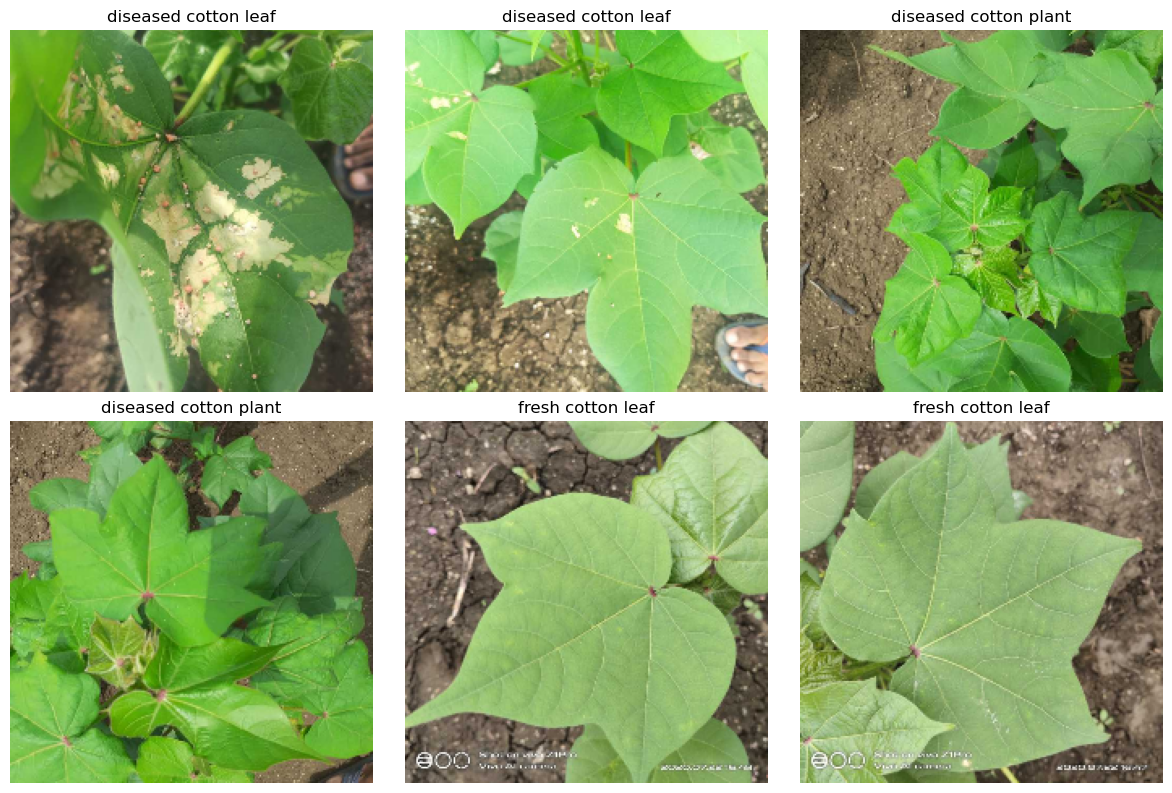

In [15]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Define function to load images and labels
def load_images_and_labels(dataset_path):
    images = []
    labels = []
    
    # Iterate over subdirectories (each subdirectory represents a class)
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        
        if os.path.isdir(class_path):
            # Iterate over each image in the class subdirectory
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                image = cv2.imread(image_path)  # Read the image
                image = cv2.resize(image, (224, 224))  # Resize the image if needed
                images.append(image)
                labels.append(class_name)
    
    return images, labels

# Load datasets
train_path = '/Users/shubhampund9767/Cotton-Disease-Recognition-using-YOLO-Algorithm--1/Cotton Disease/train'
test_path = '/Users/shubhampund9767/Cotton-Disease-Recognition-using-YOLO-Algorithm--1/Cotton Disease/test'
val_path = '/Users/shubhampund9767/Cotton-Disease-Recognition-using-YOLO-Algorithm--1/Cotton Disease/val'

X_train, y_train = load_images_and_labels(train_path)
X_test, y_test = load_images_and_labels(test_path)
X_val, y_val = load_images_and_labels(val_path)

# Function to display images in grid
def plot_images_in_grid(images, labels, num_images):
    # Set up the plot
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns for images
    axes = axes.ravel()
    
    for i, (image, label) in enumerate(zip(images[:num_images], labels[:num_images])):
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        axes[i].set_title(label)
        axes[i].axis('off')  # Remove axis for clarity
    
    plt.tight_layout()
    plt.show()

# Select images for each category
diseased_leaf_images = [X_train[i] for i in range(len(X_train)) if 'diseased cotton leaf' in y_train[i]]
diseased_plant_images = [X_train[i] for i in range(len(X_train)) if 'diseased cotton plant' in y_train[i]]
fresh_leaf_images = [X_train[i] for i in range(len(X_train)) if 'fresh cotton leaf' in y_train[i]]
fresh_plant_images = [X_train[i] for i in range(len(X_train)) if 'fresh cotton plant' in y_train[i]]

# Get corresponding labels for the selected images
diseased_leaf_labels = [y_train[i] for i in range(len(X_train)) if 'diseased cotton leaf' in y_train[i]]
diseased_plant_labels = [y_train[i] for i in range(len(X_train)) if 'diseased cotton plant' in y_train[i]]
fresh_leaf_labels = [y_train[i] for i in range(len(X_train)) if 'fresh cotton leaf' in y_train[i]]
fresh_plant_labels = [y_train[i] for i in range(len(X_train)) if 'fresh cotton plant' in y_train[i]]

# Combine images and labels from all categories
images_to_display = diseased_leaf_images[:2] + diseased_plant_images[:2] + fresh_leaf_images[:2] + fresh_plant_images[:2]
labels_to_display = diseased_leaf_labels[:2] + diseased_plant_labels[:2] + fresh_leaf_labels[:2] + fresh_plant_labels[:2]

# Check if we have enough images to display
num_images = min(len(images_to_display), 6)  # Ensure no more than available images

# Display images in a grid
plot_images_in_grid(images_to_display, labels_to_display, num_images=num_images)

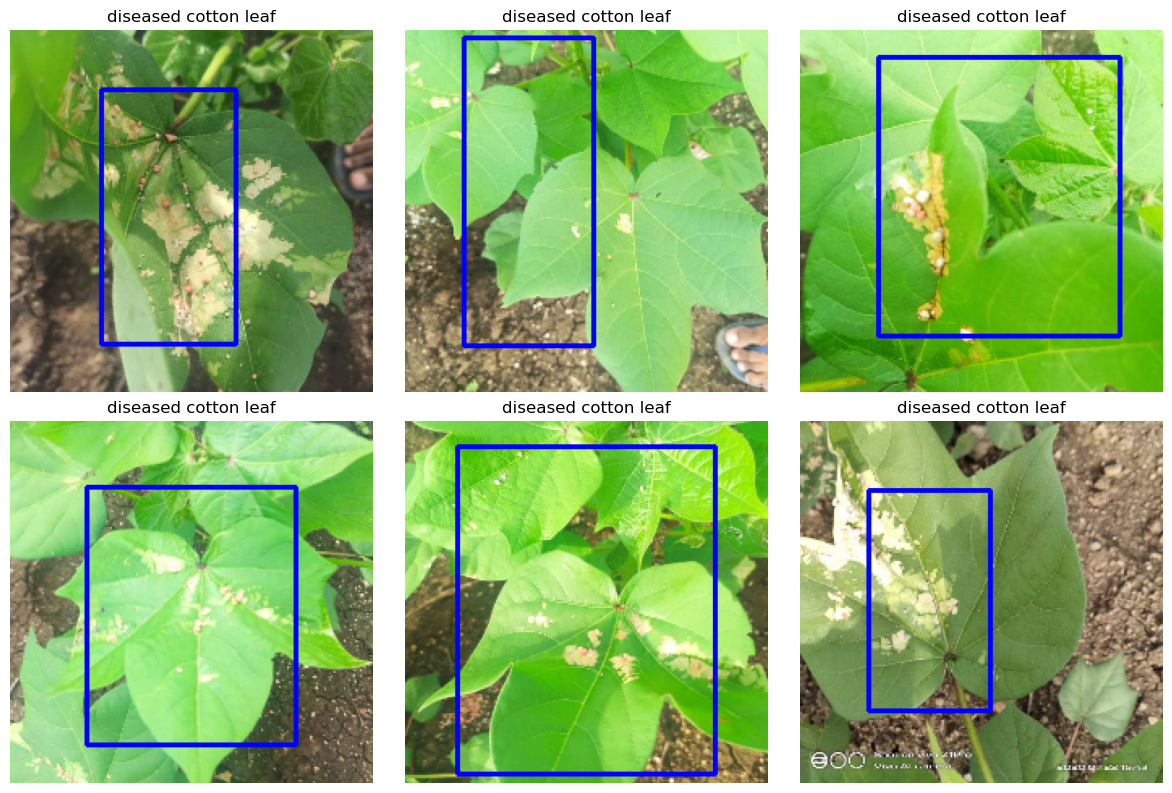

In [16]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Define function to load images and labels
def load_images_and_labels(dataset_path):
    images = []
    labels = []
    image_paths = []
    
    # Iterate over subdirectories (each subdirectory represents a class)
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        
        if os.path.isdir(class_path):
            # Iterate over each image in the class subdirectory
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                image = cv2.imread(image_path)  # Read the image
                image = cv2.resize(image, (224, 224))  # Resize the image if needed
                images.append(image)
                labels.append(class_name)
                image_paths.append(image_path)
    
    return images, labels, image_paths

# Function to generate dummy bounding boxes (for demonstration purposes)
def generate_dummy_bounding_boxes(images):
    bounding_boxes = []
    for img in images:
        height, width, _ = img.shape
        # Generate a random bounding box within the image dimensions
        x1, y1 = random.randint(0, width // 4), random.randint(0, height // 4)
        x2, y2 = random.randint(width // 2, width - 1), random.randint(height // 2, height - 1)
        bounding_boxes.append((x1, y1, x2, y2))
    return bounding_boxes

# Function to display images with bounding boxes
def plot_images_with_bounding_boxes(images, labels, bounding_boxes, num_images):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Adjust grid size as needed
    axes = axes.ravel()
    
    for i, (image, label, bbox) in enumerate(zip(images[:num_images], labels[:num_images], bounding_boxes[:num_images])):
        # Draw the bounding box
        x1, y1, x2, y2 = bbox
        image_with_bbox = image.copy()
        cv2.rectangle(image_with_bbox, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue bounding box
        
        axes[i].imshow(cv2.cvtColor(image_with_bbox, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        axes[i].set_title(label)
        axes[i].axis('off')  # Remove axis for clarity
    
    plt.tight_layout()
    plt.show()

# Load datasets
train_path = '/Users/shubhampund9767/Cotton-Disease-Recognition-using-YOLO-Algorithm--1/Cotton Disease/train'
X_train, y_train, _ = load_images_and_labels(train_path)

# Select a subset of images for demonstration
diseased_leaf_images = [X_train[i] for i in range(len(X_train)) if 'diseased cotton leaf' in y_train[i]]
diseased_leaf_labels = [y_train[i] for i in range(len(X_train)) if 'diseased cotton leaf' in y_train[i]]

images_to_display = diseased_leaf_images[:6]  # Select up to 6 images
labels_to_display = diseased_leaf_labels[:6]

# Generate dummy bounding boxes for selected images
dummy_bounding_boxes = generate_dummy_bounding_boxes(images_to_display)

# Display images with bounding boxes
plot_images_with_bounding_boxes(images_to_display, labels_to_display, dummy_bounding_boxes, num_images=len(images_to_display))

In [17]:
import os
import random
import cv2

# Define paths
train_path = '/Users/shubhampund9767/Cotton-Disease-Recognition-using-YOLO-Algorithm--1/Cotton Disease/train'
disease_class_id = 0  # Class ID for diseased images (update as needed)
annotation_output_dir = '/Users/shubhampund9767/Cotton-Disease-Recognition-using-YOLO-Algorithm--1/Cotton Disease/annotations'

# Ensure annotation directory exists
os.makedirs(annotation_output_dir, exist_ok=True)

# Function to generate dummy bounding boxes
def generate_dummy_bounding_boxes_for_image(image):
    height, width, _ = image.shape
    x1, y1 = random.randint(0, width // 4), random.randint(0, height // 4)
    x2, y2 = random.randint(width // 2, width - 1), random.randint(height // 2, height - 1)
    return x1, y1, x2, y2

# Function to save bounding boxes in YOLO format
def save_bounding_box_to_file(image_path, bbox, class_id, output_dir):
    # Get image dimensions
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    # Convert bounding box to YOLO format
    x1, y1, x2, y2 = bbox
    x_center = (x1 + x2) / 2 / width
    y_center = (y1 + y2) / 2 / height
    bbox_width = (x2 - x1) / width
    bbox_height = (y2 - y1) / height

    # YOLO annotation format
    yolo_annotation = f"{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}\n"

    # Save annotation to file
    image_name = os.path.basename(image_path)
    annotation_file = os.path.join(output_dir, os.path.splitext(image_name)[0] + '.txt')
    with open(annotation_file, 'w') as file:
        file.write(yolo_annotation)

# Process diseased images
for subdir in ['diseased cotton leaf', 'diseased cotton plant']:
    subdir_path = os.path.join(train_path, subdir)
    for image_name in os.listdir(subdir_path):
        image_path = os.path.join(subdir_path, image_name)

        # Read image and generate bounding box
        image = cv2.imread(image_path)
        if image is None:
            continue  # Skip if the image is not readable

        bbox = generate_dummy_bounding_boxes_for_image(image)

        # Save bounding box annotation
        save_bounding_box_to_file(image_path, bbox, disease_class_id, annotation_output_dir)

print("Bounding boxes and annotations saved successfully!")

Bounding boxes and annotations saved successfully!


In [18]:
from sklearn.preprocessing import LabelBinarizer

# One-hot encode labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
y_val = lb.transform(y_val)

print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")
print(f"Validation labels shape: {y_val.shape}")

Training labels shape: (1951, 4)
Testing labels shape: (106, 4)
Validation labels shape: (253, 4)


In [19]:
import tensorflow as tf

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

In [20]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=10,  # Adjust epochs as needed
    validation_data=val_dataset
)

Epoch 1/10


2025-01-27 23:19:08.627685: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


61/61 [==============================] - 16s 246ms/step - loss: 1.1753 - accuracy: 0.5407 - val_loss: 0.8195 - val_accuracy: 0.6285
Epoch 2/10
61/61 [==============================] - 15s 248ms/step - loss: 0.7916 - accuracy: 0.6725 - val_loss: 0.7388 - val_accuracy: 0.7115
Epoch 3/10
61/61 [==============================] - 16s 257ms/step - loss: 0.7204 - accuracy: 0.7068 - val_loss: 0.6338 - val_accuracy: 0.7312
Epoch 4/10
61/61 [==============================] - 16s 269ms/step - loss: 0.6720 - accuracy: 0.7309 - val_loss: 0.5888 - val_accuracy: 0.7826
Epoch 5/10
61/61 [==============================] - 16s 264ms/step - loss: 0.6303 - accuracy: 0.7514 - val_loss: 0.5993 - val_accuracy: 0.7628
Epoch 6/10
61/61 [==============================] - 16s 267ms/step - loss: 0.6107 - accuracy: 0.7617 - val_loss: 0.5450 - val_accuracy: 0.8063
Epoch 7/10
61/61 [==============================] - 17s 278ms/step - loss: 0.5853 - accuracy: 0.7627 - val_loss: 0.5874 - val_accuracy: 0.7787
Epoch 8/10

In [21]:
model.save("latestmodel.h5")